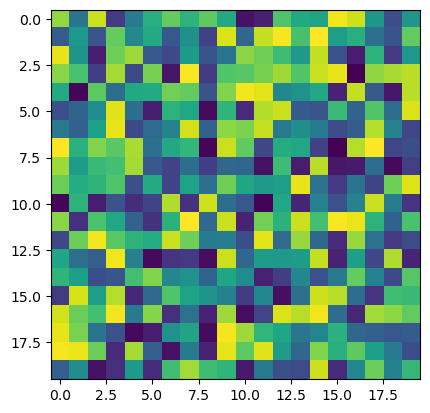

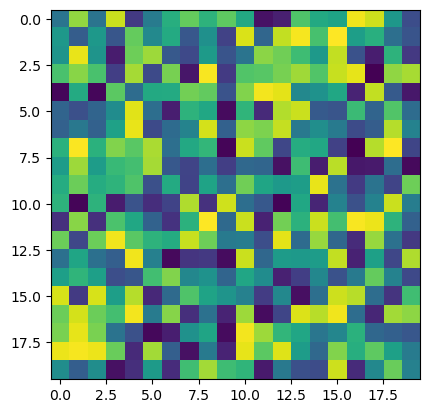

In [16]:
# Shifting Pixels by 1:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = np.random.randint(0,256,size=[20,20], dtype='uint8')

# Find a 3x3 kernel that is going to shift the entire image by 1.
kernel = np.array\
    ([[0,0,0],
      [1,0,0],
      [0,0,0]])

shift = cv2.filter2D(img, -1, kernel)

plt.imshow(img)
plt.show()

plt.imshow(shift)
plt.show()

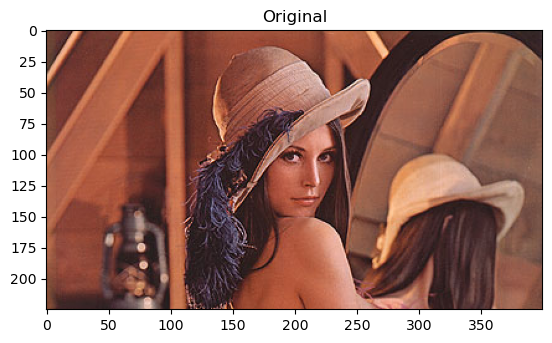

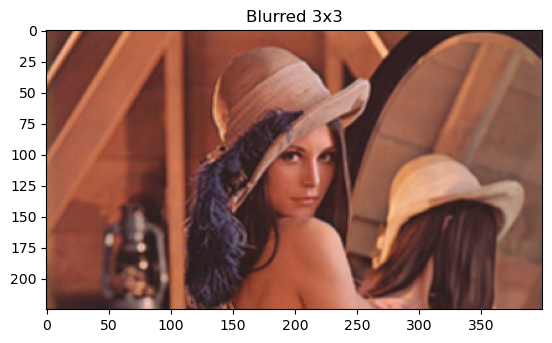

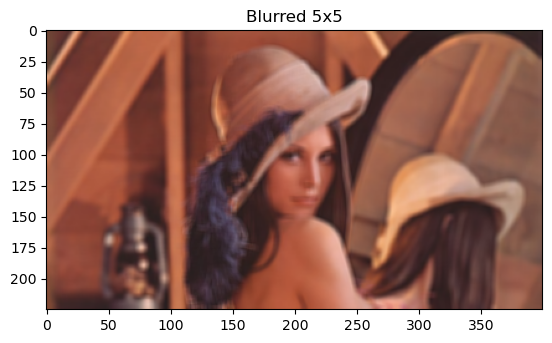

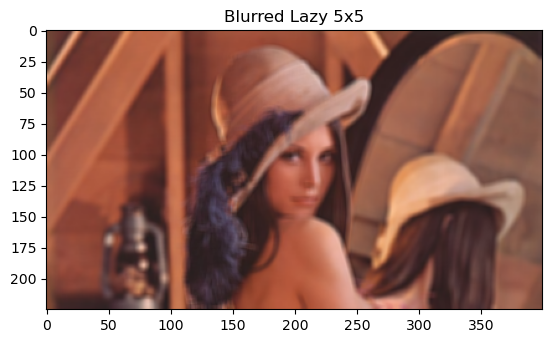

In [17]:
# Mean Filter (Average)

img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel5x5 = np.ones((5,5), np.float32)/25
kernel3x3 = np.array\
    ([[1,1,1],
      [1,1,1],
      [1,1,1]])/9

blurred3x3 = cv2.filter2D(img, -1, kernel3x3)
blurred5x5 = cv2.filter2D(img, -1, kernel5x5)

blurredLazy = cv2.blur(img, (5,5))

plt.imshow(img), plt.title("Original")
plt.show()

plt.imshow(blurred3x3), plt.title("Blurred 3x3")
plt.show()

plt.imshow(blurred5x5), plt.title("Blurred 5x5")
plt.show()

plt.imshow(blurredLazy), plt.title("Blurred Lazy 5x5")
plt.show()

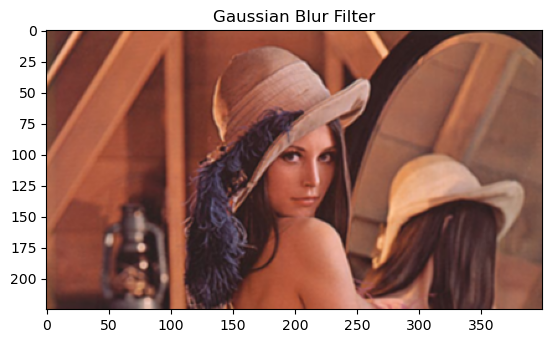

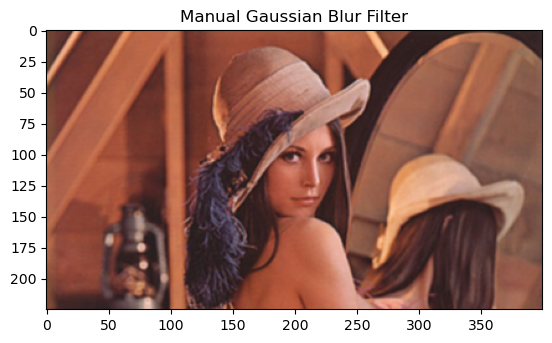

In [18]:
# Gaussian Filter
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gaussianKernel3x3 = np.array\
    ([[1/16,1/8,1/16],
      [1/8,1/4,1/8],
      [1/16,1/8,1/16]])

kernelSize = (3, 3)
gaussianBlurImg = cv2.GaussianBlur(src=img, ksize=kernelSize, sigmaX=0, sigmaY=0)

gaussianBlur3x3 = cv2.filter2D(img, -1, gaussianKernel3x3)

plt.imshow(gaussianBlurImg), plt.title("Gaussian Blur Filter")
plt.show()

plt.imshow(gaussianBlur3x3), plt.title("Manual Gaussian Blur Filter")
plt.show()

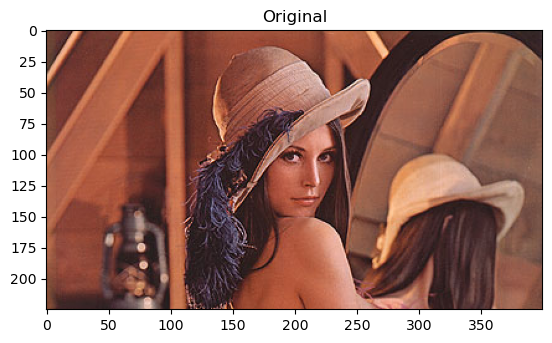

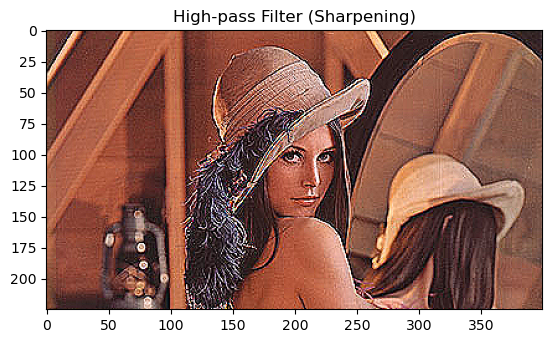

In [19]:
# High-pass Filter
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.array\
    ([[0,-1,0],
      [-1,5,-1],
      [0,-1,0]])

sharpened = cv2.filter2D(img, -1, kernel)

plt.imshow(img), plt.title("Original")
plt.show()

plt.imshow(sharpened), plt.title("High-pass Filter (Sharpening)")
plt.show()

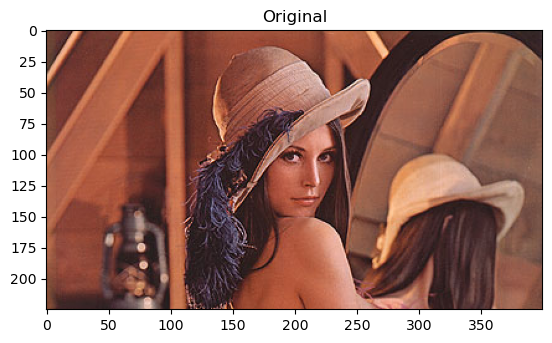

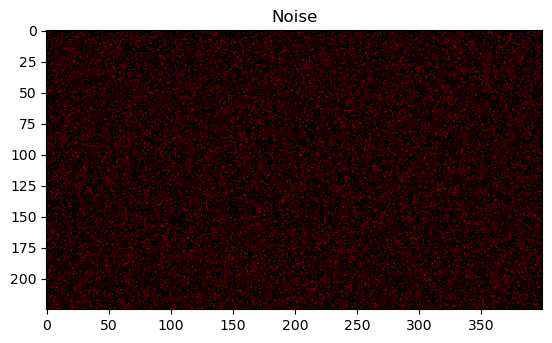

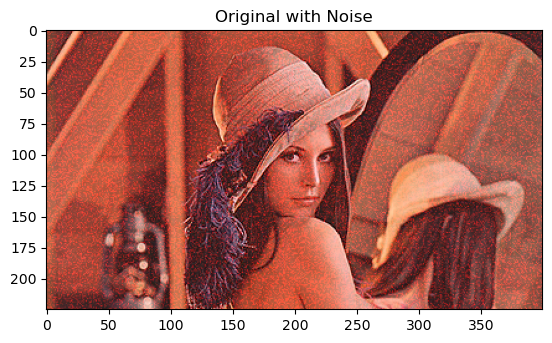

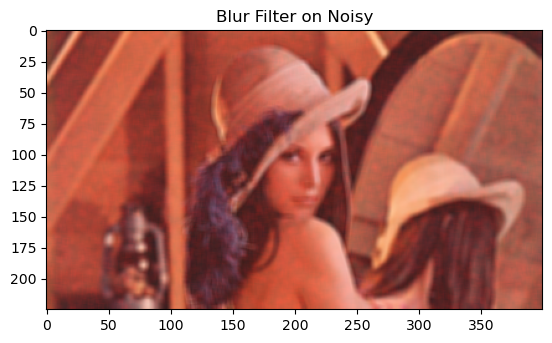

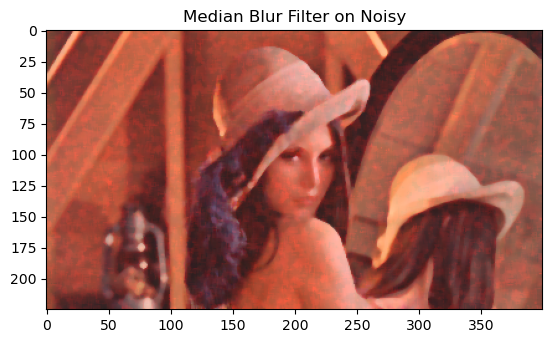

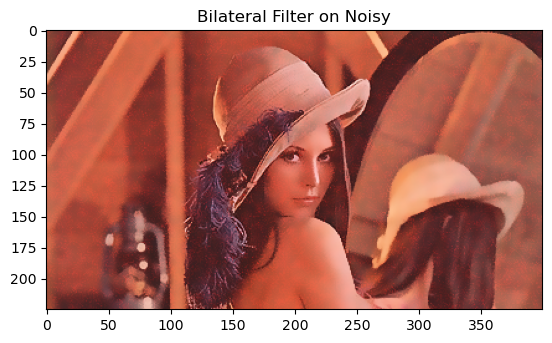

In [20]:
# Non Linear Filters
# Example: Median Filter (Effective for Salt and Pepper)

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img), plt.title('Original')
plt.show()

noise = np.zeros(img.shape, np.uint8)
mean = 20 # Average (where normal distribution peaks)
sigma = 50 # Standard Deviation
cv2.randn(noise, mean, sigma)

plt.imshow(noise,cmap='gray'), plt.title('Noise')
plt.show()

img_noise = cv2.add(img,noise)
plt.imshow(img_noise), plt.title('Original with Noise')
plt.show()

#img_to_save = cv2.cvtColor(img_noise, cv2.COLOR_RGB2BGR)
#cv2.imwrite("images/noise_lena2.png",img_to_save)

# Attempting to fix noisy image

# Attempt 1: Mean Blur
blur = cv2.blur(img_noise, (5,5))
plt.imshow(blur), plt.title('Blur Filter on Noisy')
plt.show()

# Attempt 2: Median Blur
medianBlur = cv2.medianBlur(img_noise, 5)
plt.imshow(medianBlur), plt.title('Median Blur Filter on Noisy')
plt.show()

# Attempt 3: Bilateral Filter
bilateralFilter = cv2.bilateralFilter(img_noise, 9, 75, 75)
plt.imshow(bilateralFilter), plt.title('Bilateral Filter on Noisy')
plt.show()

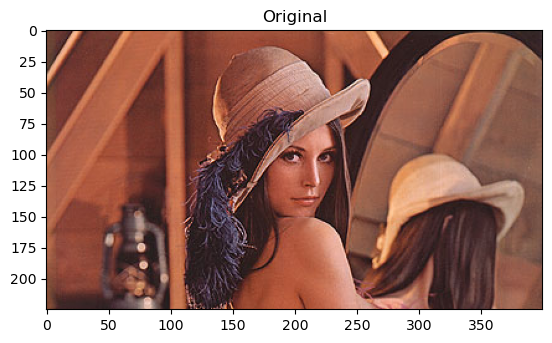

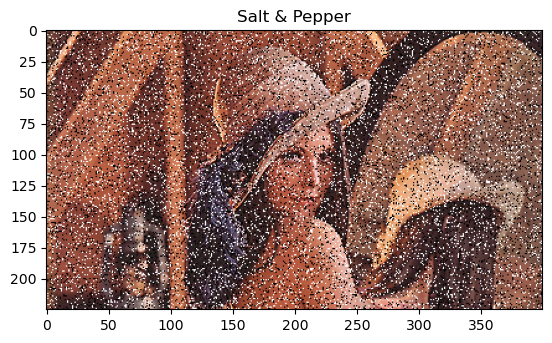

In [23]:
#SNR means signal to noise ratio
def add_salt_pepper(img, SNR):
    _img = img.copy()
    c, h, w = _img.shape
    mask = np.random.choice((0,1,2), size=(1,h,w), p=[SNR, (1-SNR)/2., (1-SNR)/2.])
    mask = np.repeat(mask, c, axis=0)

    _img[mask == 1] = 255 #salt
    _img[mask == 2] = 0 #pepper

    return _img

img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img), plt.title('Original')
plt.show()

image_noise = add_salt_pepper(img.transpose(2,1,0), 0.8)
image_noise = image_noise.transpose(2,1,0)
plt.imshow(image_noise), plt.title('Salt & Pepper')
plt.show()